In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#read csv data 
data=pd.read_csv("case_study_junior_ds.csv")

In [106]:
#how the data looks like 
data

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0
...,...,...,...,...,...
469303,283467963549,1396,2022-07-14,13000,25
469304,678604970059,5133,2022-07-14,3000,25
469305,2482491145775,3980,2022-07-14,7000,25
469306,2791728932601,6522,2022-07-14,1357,25


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   keyword_id     469308 non-null  int64 
 1   keyword_rank   469308 non-null  int64 
 2   date           469308 non-null  object
 3   searches       469308 non-null  int64 
 4   search_engine  469308 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 17.9+ MB


In [108]:
# Sort the DataFrame by keyword_rank in descending order

data_sorted=data.sort_values(by='searches',ascending=False)

In [109]:
data_sorted

,keyword_id,keyword_rank,date,searches,search_engine
368042,910533449676,22,2022-07-11,18637157,11
365307,910533449676,29,2022-07-10,17117887,11
256908,1073742334476,25,2022-07-10,11645099,6
404919,1554778255514,3,2022-07-11,10424650,13
258034,1073742334476,29,2022-07-11,10350050,6
...,...,...,...,...,...
81148,403727054554,196038,2022-07-08,0,3
81149,403727082512,217213,2022-07-08,0,3
81150,429496849678,1580864,2022-07-08,0,3
237296,798864389384,391275,2022-07-14,0,5


In [110]:
numeric_data = data[['keyword_rank', 'searches','search_engine']]


In [111]:
correlation_matrix = numeric_data.corr()


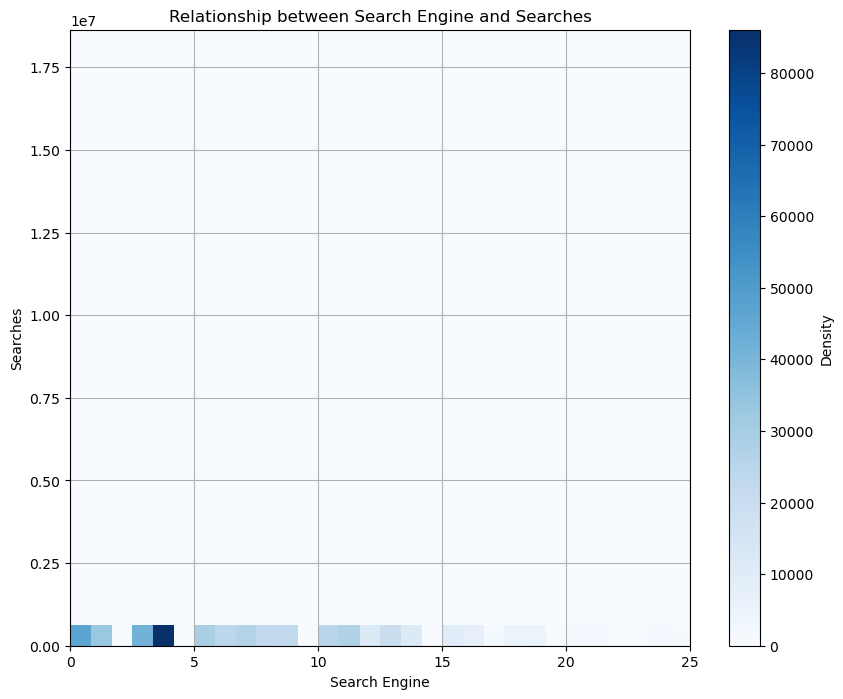

In [112]:
# Plot 2D histogram (heatmap) for search_engine and searches
plt.figure(figsize=(10, 8))
plt.hist2d(data['search_engine'], data['searches'], bins=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Relationship between Search Engine and Searches')
plt.xlabel('Search Engine')
plt.ylabel('Searches')
plt.grid(True)

# Show plot
plt.show()

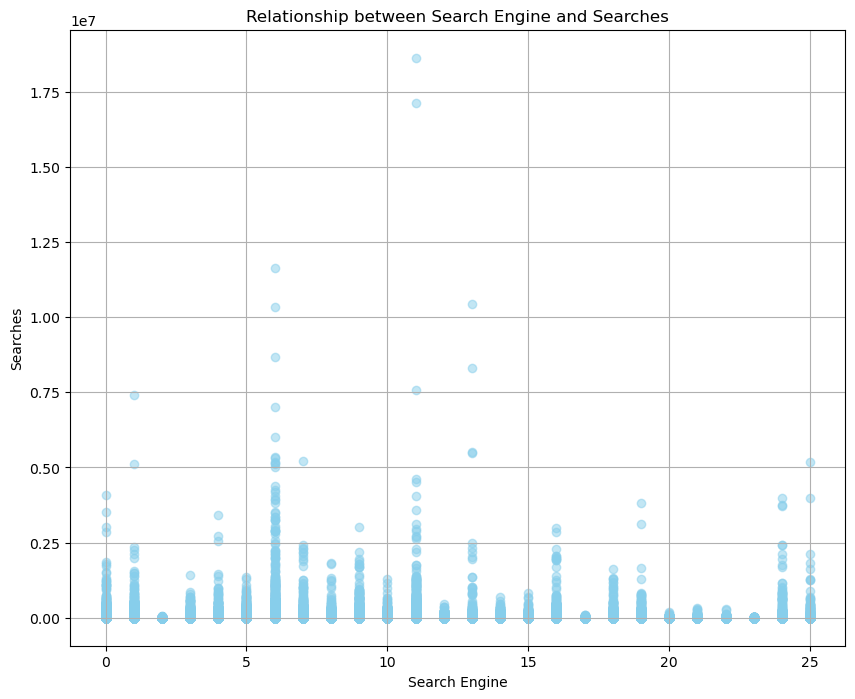

In [113]:
# Create a scatter plot for search_engine and searches
plt.figure(figsize=(10, 8))
plt.scatter(data['search_engine'], data['searches'], alpha=0.5, color='skyblue')
plt.title('Relationship between Search Engine and Searches')
plt.xlabel('Search Engine')
plt.ylabel('Searches')
plt.grid(True)

# Show plot
plt.show()


In [114]:
# Convert 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Group the data by "date" and find the row with the maximum "searches" value
max_searches_data = data.loc[data.groupby('date')['searches'].idxmax()]

# Select only the relevant columns
max_searches_data = max_searches_data[['date', 'search_engine', 'searches', 'keyword_id']]

# Display the data
print(max_searches_data)

             date  search_engine  searches    keyword_id
359834 2022-07-08             11   2938722  910533449676
362556 2022-07-09             11   2615729  910533449676
365307 2022-07-10             11  17117887  910533449676
368042 2022-07-11             11  18637157  910533449676
370771 2022-07-12             11   2890242  910533449676
373461 2022-07-13             11   2713843  910533449676
376142 2022-07-14             11   3113288  910533449676


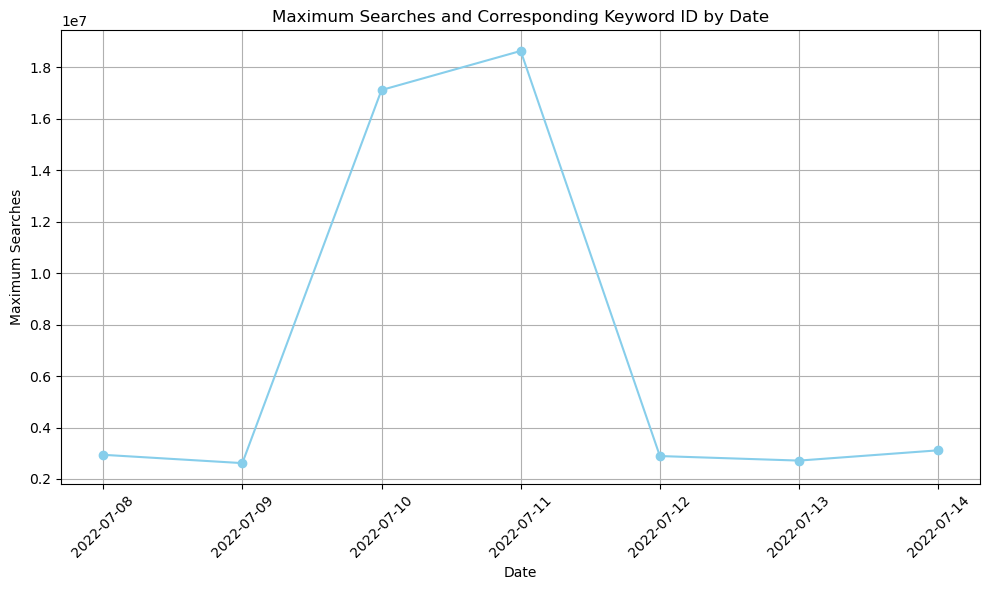

In [115]:
# Convert 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Group the data by "date" and find the row with the maximum "searches" value
max_searches_data = data.loc[data.groupby('date')['searches'].idxmax()]

# Select only the relevant columns
max_searches_data = max_searches_data[['date', 'search_engine', 'searches', 'keyword_id']]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(max_searches_data['date'], max_searches_data['searches'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Maximum Searches')
plt.title('Maximum Searches and Corresponding Keyword ID by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
# Group the data by "search_engine" and find the row with the highest "keyword_rank" in each group
max_keyword_rank_data = data.loc[data.groupby('search_engine')['keyword_rank'].idxmax()]

# Select the "keyword_id" and "searches" columns for the rows with the highest "keyword_rank" in each group
max_keyword_rank_searches = max_keyword_rank_data[['search_engine', 'keyword_id', 'searches']]

# Display the results
print(max_keyword_rank_searches)

        search_engine     keyword_id  searches
41085               0  1649267619424         0
72473               1  4200478159409         0
79953               2  4320737145157         0
100972              3  3315714791994         0
176662              4   309237769130         0
226384              5  1657857444158         0
260959              6  2345052261016         0
264878              7  2190433416679         0
308981              8  2551210806977         0
326432              9  1434519289479         0
349002             10  2336462351692         0
364990             11  4269197775311         0
392238             12   137438988329         0
415649             13  2104534075855         0
422095             14   592705598858         0
436276             15  1434519135794         0
444418             16   120259187188         0
447019             17  3066606690966         0
450933             18  3564823085885         0
456900             19    34360096338         0
459881       

In [117]:
# Find the row with the maximum "searches" value for each "search_engine" and get the corresponding "keyword_id"
max_searches_per_keyword = data.loc[data.groupby('search_engine')['searches'].idxmax()][['search_engine', 'keyword_id', 'searches']]

# Display the result
print(max_searches_per_keyword)

        search_engine     keyword_id  searches
13761               0   283468093540   4083115
73316               1   704374905883   7419497
80000               2  1468878823627     44000
95686               3   292058137752   1421894
140933              4  3985729678088   3430634
231162              5   575525711518   1360524
256908              6  1073742334476  11645099
270369              7   369367302479   5210783
294612              8  1606317975332   1807732
316191              9  1090922017637   3027210
343909             10   953483220498   1290403
368042             11   910533449676  18637157
390809             12  2190433516345    447356
404919             13  1554778255514  10424650
420690             14  1133871515516    691559
432319             15  2035814640613    827380
441858             16   171799086383   3000050
448137             17  4063039262733    104000
452419             18   188978789894   1622629
454623             19   120259234373   3814478
459515       

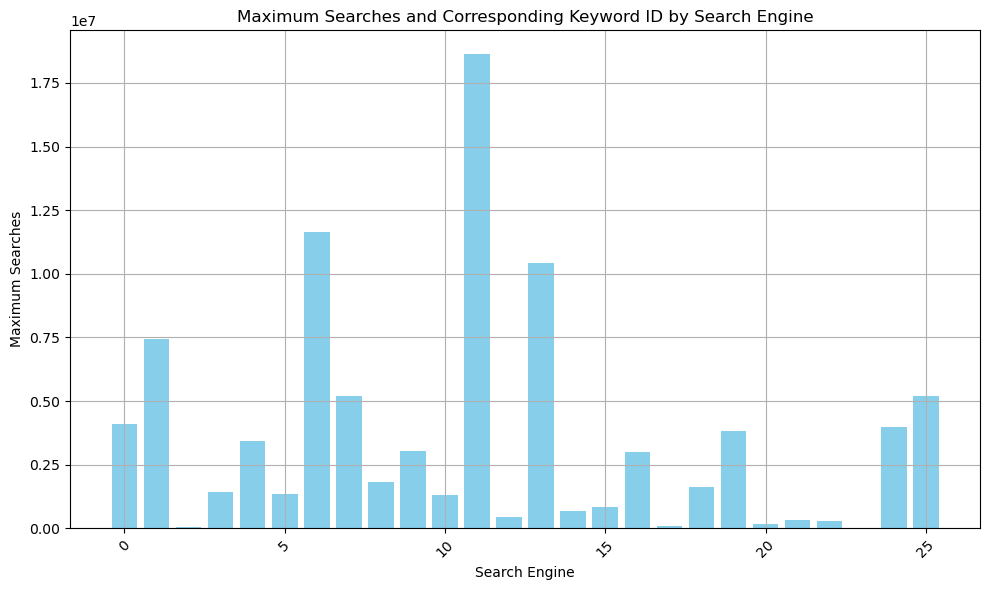

In [118]:
# Find the row with the maximum "searches" value for each "search_engine" and get the corresponding "keyword_id"
max_searches_per_keyword = data.loc[data.groupby('search_engine')['searches'].idxmax()][['search_engine', 'keyword_id', 'searches']]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(max_searches_per_keyword['search_engine'], max_searches_per_keyword['searches'], color='skyblue')
plt.xlabel('Search Engine')
plt.ylabel('Maximum Searches')
plt.title('Maximum Searches and Corresponding Keyword ID by Search Engine')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Top Keyword per Search Engine:
    search_engine     keyword_id  searches
0               0   283468093540   9512016
1               1   704374905883  19481897
2               2   532575953139     92000
3               3  4148938482137   3478171
4               4   309238066050   8062389
5               5   575525711518   5158211
6               6  1073742334476  33569733
7               7   369367302479   8880784
8               8  1606317975332   9485243
9               9  1090922017637   6259970
10             10   953483220498   4134516
11             11   910533449676  50026868
12             12  2190433516345   1287542
13             13  1554778255514  29706897
14             14  1133871515516   2420435
15             15  2035814640613   2621526
16             16   171799086383  13000965
17             17  4063039262733    488044
18             18   188978789894   4943897
19             19   120259234373   9499018
20             20   566935803928    506231
21             21  2628

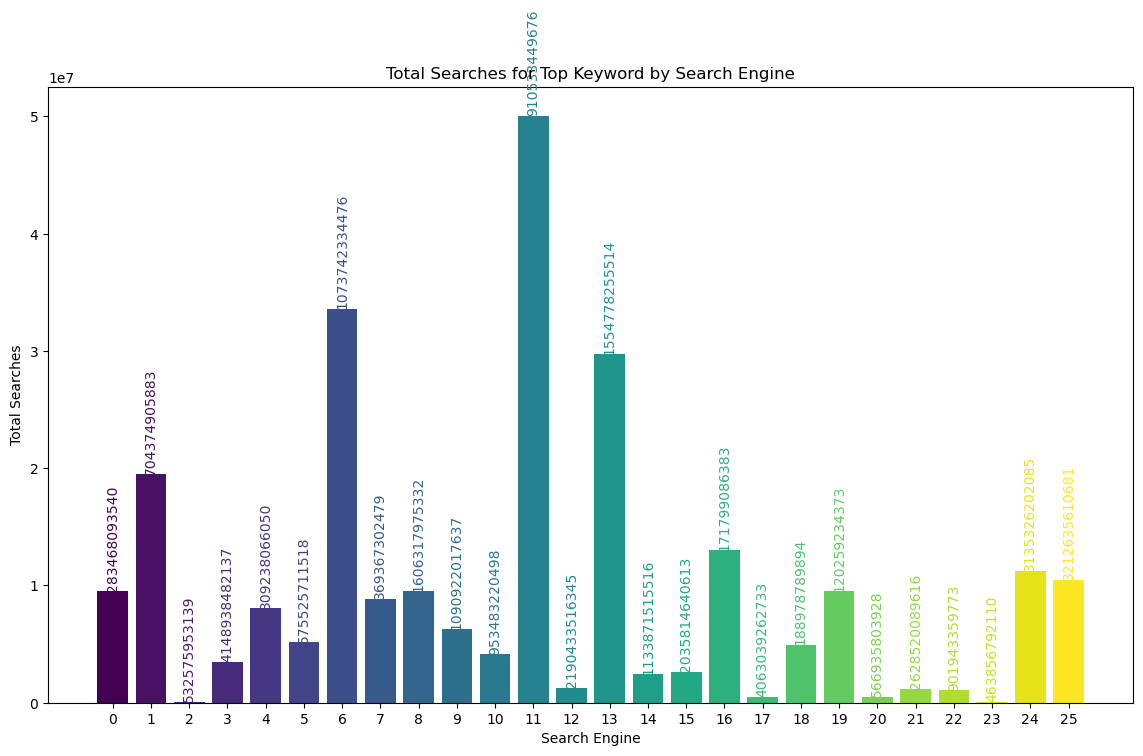

In [119]:
# Calculate the total searches for each keyword within each search engine
total_searches = data.groupby(['search_engine', 'keyword_id'])['searches'].sum()

# Determine the top keyword for each search engine by total searches
# Adjust to handle the deprecation warning properly
top_keywords_per_engine = total_searches.reset_index().groupby('search_engine', as_index=False).apply(
    lambda x: x.nlargest(1, 'searches')
).reset_index(drop=True)

# Print the results
print("Top Keyword per Search Engine:")
print(top_keywords_per_engine)

# Creating a color map for the top keywords
unique_keywords = top_keywords_per_engine['keyword_id'].astype(str).unique()
color_map = plt.get_cmap('viridis', len(unique_keywords))
colors = color_map(np.linspace(0, 1, len(unique_keywords)))
keyword_to_color = dict(zip(unique_keywords, colors))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot of the top keyword's total searches for each search engine
for idx, row in top_keywords_per_engine.iterrows():
    color = keyword_to_color[str(row['keyword_id'])]
    ax.bar(row['search_engine'], row['searches'], color=color)
    # Display keyword_id vertically
    ax.text(row['search_engine'], row['searches'] + 3, str(row['keyword_id']), color=color, ha='center', va='bottom', rotation=90)

# Add labels and title
ax.set_xlabel('Search Engine')
ax.set_ylabel('Total Searches')
ax.set_title('Total Searches for Top Keyword by Search Engine')
plt.xticks(top_keywords_per_engine['search_engine'])  # Ensure all search engines are labeled

plt.show()